In [1]:
import pandas as pd

In [3]:
train_df = pd.read_csv('labeled/train/label.csv')
valid_df = pd.read_csv('labeled/valid/label.csv')
test_df = pd.read_csv('labeled/test/label.csv')

## Mô tả

In [26]:
train_df.describe()

,age,gender
count,16595.000000,16595.000000
mean,33.263814,0.478698
std,19.841005,0.499561
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,116.000000,1.000000


In [27]:
valid_df.describe()

,age,gender
count,3556.000000,3556.000000
mean,33.219629,0.471597
std,20.030718,0.499263
min,1.000000,0.000000
25%,23.000000,0.000000
50%,29.000000,0.000000
75%,45.000000,1.000000
max,111.000000,1.000000


In [28]:
test_df.describe()

,age,gender
count,3557.000000,3557.000000
mean,33.572392,0.476806
std,19.954565,0.499532
min,1.000000,0.000000
25%,24.000000,0.000000
50%,30.000000,0.000000
75%,45.000000,1.000000
max,110.000000,1.000000


## Tỉ lệ dữ liệu

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
def plot_bar(labels, values, title = '', save=None):
    values = np.array(values)
    total = sum(values)

    plt.figure(figsize=(6,4))
    bars = plt.bar(labels, values / total * 100)

    for bar, value in zip(bars, values):
        percent = value / total * 100
        plt.text(bar.get_x() + bar.get_width()/2, percent + 1, f'{value} - {percent:.2f}%', 
                ha='center', va='bottom', fontsize=12)

    plt.title(title, fontsize=14)
    plt.ylabel("Tỷ lệ (%)", fontsize=12)
    plt.ylim(0, 80)
    plt.grid(axis='y', linestyle='--', alpha=0.6)

    if save:
        plt.savefig(save, dpi=450)

    plt.show()

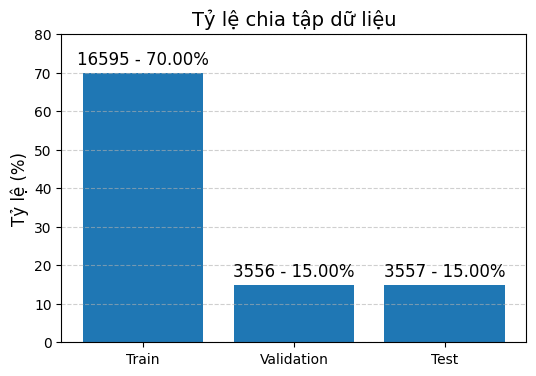

In [41]:
splits = ['Train', 'Validation', 'Test']
values = [train_df.shape[0], valid_df.shape[0], test_df.shape[0]]
plot_bar(splits, values, title='Tỷ lệ chia tập dữ liệu', save='data_visualization/split_ratio.png')

## Tỉ lệ giới tính

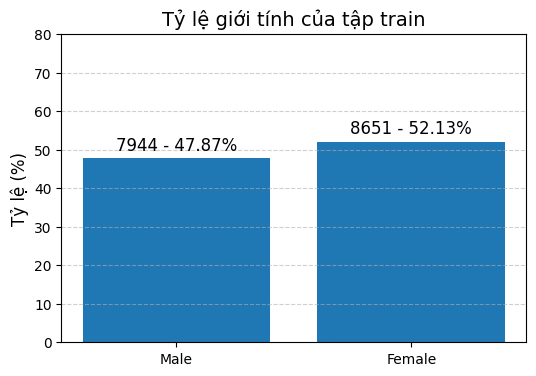

In [42]:
genders = ['Male', 'Female']
values = [(train_df.gender == 1).sum(), (train_df.gender == 0).sum()]
plot_bar(genders, values, title='Tỷ lệ giới tính của tập train', save='data_visualization/gender.png')

## Phân phối tuổi

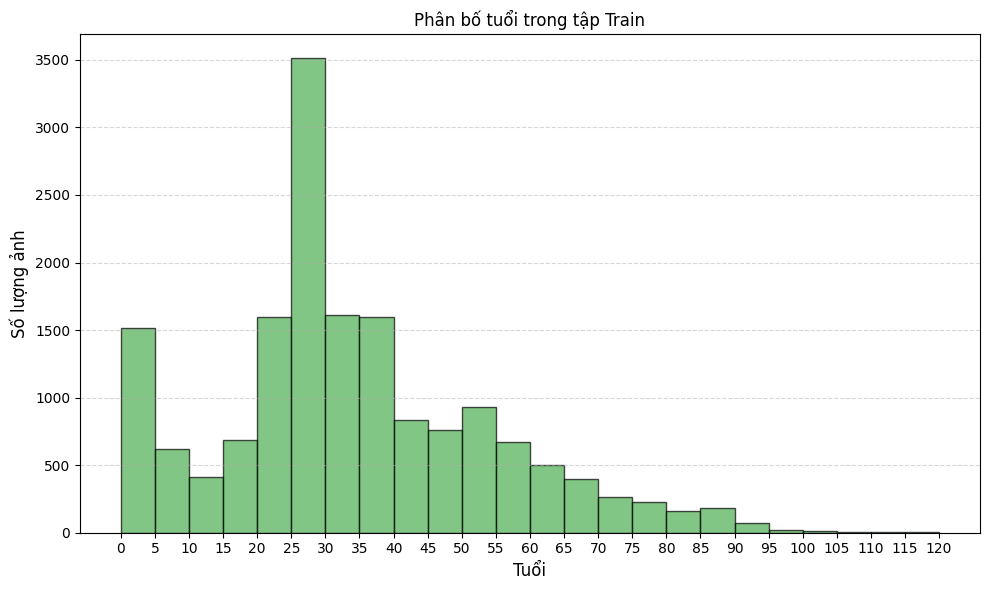

In [43]:
plt.figure(figsize=(10,6))

plt.hist(train_df['age'], bins=range(0, 121, 5), color='#4CAF50', alpha=0.7, edgecolor='black')
plt.title("Phân bố tuổi trong tập Train")
plt.xlabel("Tuổi", fontsize=12)
plt.ylabel("Số lượng ảnh", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(range(0, 121, 5))
plt.tight_layout()
plt.savefig('data_visualization/age.png', dpi=450)
plt.show()